In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections
%matplotlib inline

### define potential variables from `gridded` package

In [2]:
x = np.array([-0.101, -0.08 , -0.069, -0.054, -0.09 , -0.069, -0.069, -0.08 , -0.08 , -0.085, 
              -0.087, -0.097, -0.104, -0.102, -0.115, -0.099,-0.052, -0.052, -0.069, -0.064, 
              -0.045, -0.052, -0.04 , -0.026, 0.017,  0.012,  0.027,  0.019,  0.001, -0.012, 
              -0.029, -0.038,-0.03 , -0.007, -0.057, -0.025, -0.077, -0.059])
y = np.array([0.872, 0.883, 0.888, 0.89 , 0.904, 0.907, 0.921, 0.919, 0.966, 0.973, 0.965, 
              0.965, 0.987, 0.993, 1.001, 0.996, 1.022, 1.017,1.01 , 1.005, 0.98 , 0.975, 
              0.973, 0.968, 0.9  , 0.895, 0.893,0.886, 0.883, 0.884, 0.883, 0.879, 0.907, 
              0.905, 0.916, 0.933,0.99 , 0.993])

In [3]:
# create lon and lat array
lon = np.degrees(x)
lat = np.degrees(y)

In [4]:
# create faces with 3, 4 and 5 vertices
faces = np.array([[13, 10, 22, -999, -999], 
                  [30, 27, 24,   32, -999],
                  [30, 32,  7,    4,    2],
                  [ 0,  2,  4, -999, -999],
                  [ 7, 32, 24,   22,   10]]) 

In [5]:
# fill value to fill vertices up to max nodes in face
fill_val = -999

In [6]:
# data value for faces
data_color = np.array([1, 2, 3, 4, 5])

### filter the faces using the `fill_val`

In [7]:
# start filtering the fill value from the faces
faces = np.array([i[i != fill_val] for i in faces])
faces

array([array([13, 10, 22]), array([30, 27, 24, 32]),
       array([30, 32,  7,  4,  2]), array([0, 2, 4]),
       array([ 7, 32, 24, 22, 10])], dtype=object)

### combine `lon` and `lat` and slice using `faces`

In [8]:
# stack array along last axis
lonlat = np.c_[lon, lat]
patches = np.array([lonlat[face] for face in faces])
patches[0]

array([[-5.84416951, 56.89470906],
       [-4.98473282, 55.29042723],
       [-2.29183118, 55.74879347]])

### plot the figure using `PolyCollection` for both `facecolor` and `edgecolor`

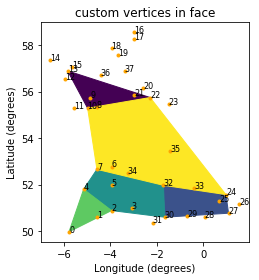

In [9]:
# figure uses coloring for both facecolor and edgecolor
plt.figure()
plt.gca().set_aspect('equal')
ax=plt.gca()

# add collection of faces with color for face and edge
pc_face = matplotlib.collections.PolyCollection(patches, array=data_color, 
                                                cmap='viridis', edgecolor='face')
ax.add_collection(pc_face)

plt.plot(lon, lat, marker=".", ls="", color="orange")

plt.title('custom vertices in face')
plt.xlabel('Longitude (degrees)')
plt.ylabel('Latitude (degrees)')

for i, (xi,yi) in enumerate(lonlat):
    plt.text(xi,yi,i, size=8)

plt.tight_layout()
plt.show()

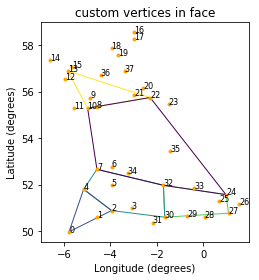

In [10]:
# figure uses coloring for edgecolor only
plt.figure()
plt.gca().set_aspect('equal')
ax=plt.gca()

# add collection of faces with edgecolor only
pc_edge = matplotlib.collections.PolyCollection(patches, array=data_color, 
                                                cmap='viridis_r', color='', facecolor='none')
ax.add_collection(pc_edge)

plt.plot(lon, lat, marker=".", ls="", color="orange")

plt.title('custom vertices in face')
plt.xlabel('Longitude (degrees)')
plt.ylabel('Latitude (degrees)')

for i, (xi,yi) in enumerate(lonlat):
    plt.text(xi,yi,i, size=8)

plt.tight_layout()
plt.show()